# 1.  DB Scan - 군집화
## - 특징

* K-Means
  * 중심기반 군집화(가정: 유사한 데이터들은 같은 중심점을 가지고 분포한다)
  * 사전에 군집수 K값 설정 필요
  * 복잡한 형태의 군집화 어려움
      
* DB Scan
  * 밀도기반 군집화(가정: 유사한 데이터들은 서로 근접하게 분포한다)
  * 사전에 군집수 설정 불필요
  * 복잡한 형태의 군집화 가능

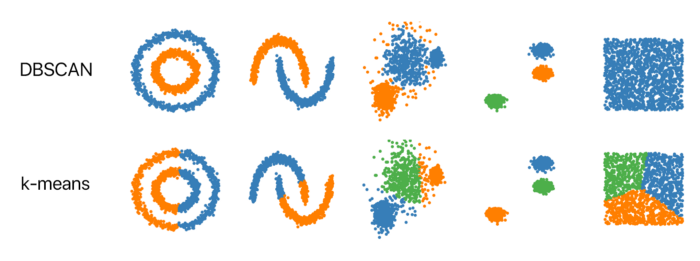

## - 원리
1. 한 점으로부터 일정 반경(eps)안에 있는 데이터의 수가 일정 기준(min_samples)보다 많으면 그 점은 Core로 간주
2. 한 점으로부터 일정 반경(eps)안에 있는 데이터의 수가 min_samples 보다 적으면 Border로 간주(Not Core)
3. 한 Core로부터 일정 반경(eps)안에 다른 Core가 있으면 같은 군집으로 분류
4. 반복하며 군집을 확산해 나감
5. Noise : 어느 군집에도 속하지 않는 데이터, 이상치로 판단하고 군집화 하지 않음
  * hyperparameter = eps, min_samples
  
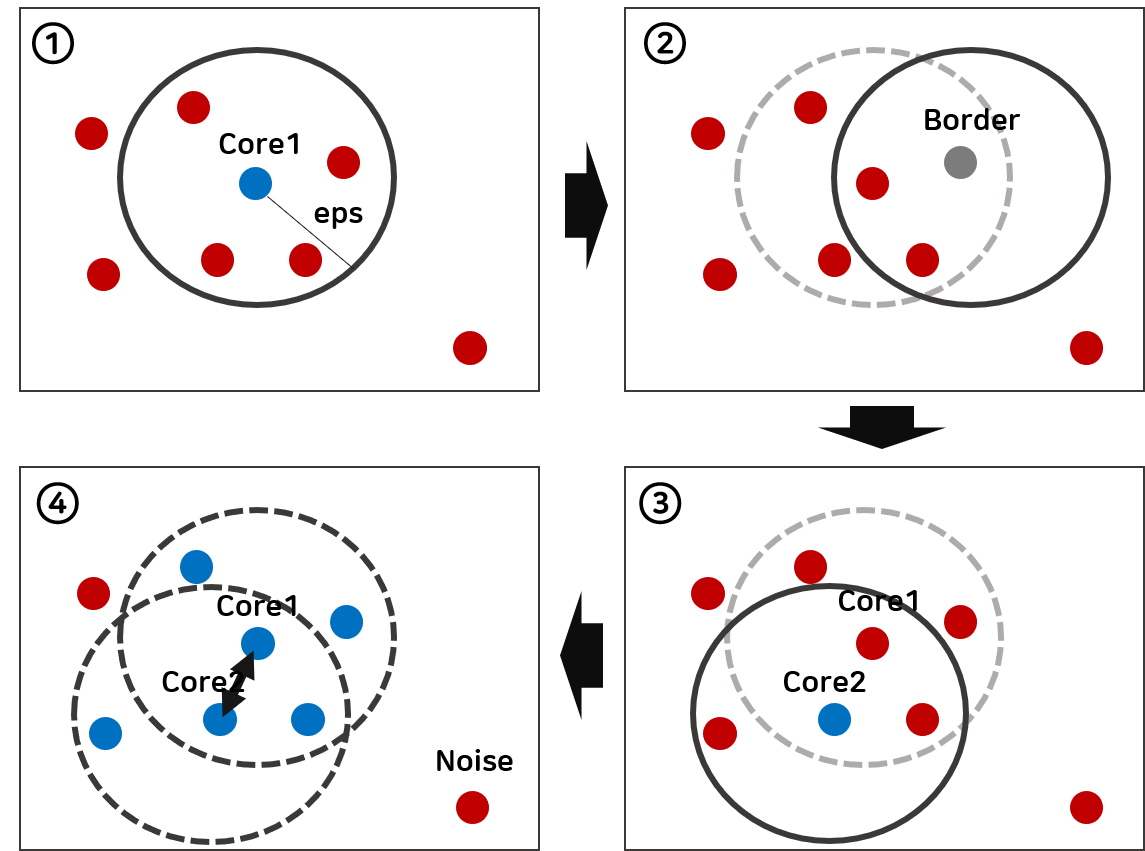

## * 예시1

### - DataLoad

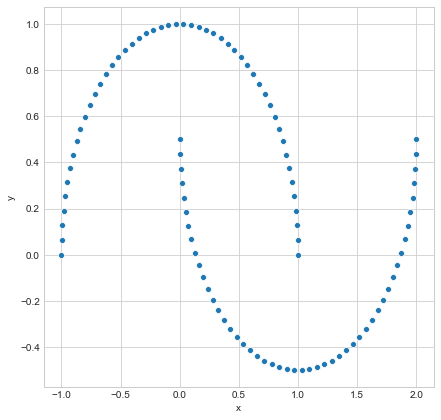

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

df = pd.DataFrame(datasets.make_moons()[0], columns = ['x', 'y'])

plt.figure(figsize = (7,7))
sns.scatterplot(x = 'x', y = 'y', data = df)
plt.show()

### - K-Means vs DBScan

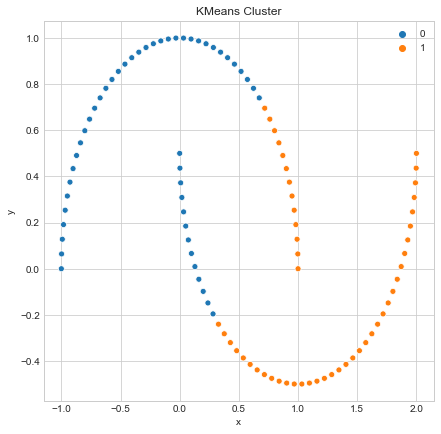

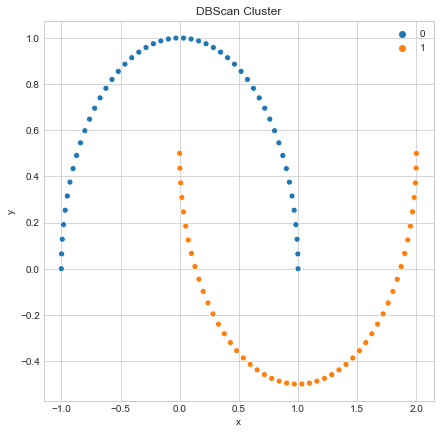

In [2]:
kmeans = KMeans(n_clusters = 2, )
dbscan = DBSCAN(eps = 0.5, min_samples = 5,)

cluster = kmeans.fit_predict(df)
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'x', y = 'y', data = df, hue = cluster)
plt.title('KMeans Cluster')
plt.show()

cluster = dbscan.fit_predict(df)
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'x', y = 'y', data = df, hue = cluster)
plt.title('DBScan Cluster')
plt.show()

## * 예시2

### - DataLoad

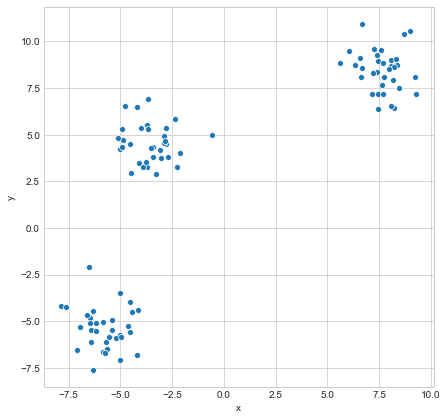

In [3]:
df = pd.DataFrame(datasets.make_blobs()[0], columns = ['x', 'y'])

plt.figure(figsize = (7,7))
sns.scatterplot(x = 'x', y = 'y', data = df)
plt.show()

### - K-Means vs DBScan

<Figure size 504x504 with 0 Axes>

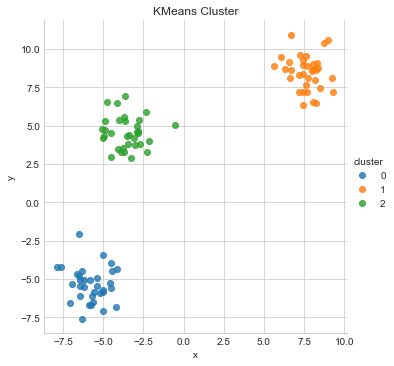

<Figure size 504x504 with 0 Axes>

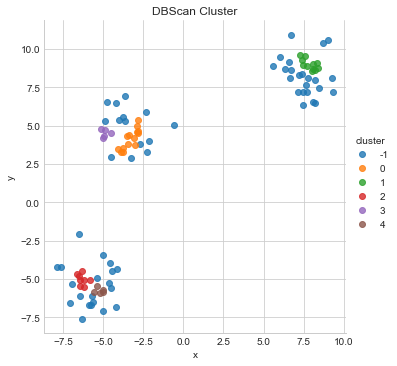

In [4]:
kmeans = KMeans(n_clusters = 3, )

cluster = kmeans.fit_predict(df)
df['cluster'] = cluster
plt.figure(figsize = (7,7))
sns.lmplot(x = 'x', y = 'y', data = df, hue = 'cluster', fit_reg = False)
plt.title('KMeans Cluster')
plt.show()

cluster = dbscan.fit_predict(df)
df['cluster'] = cluster
plt.figure(figsize = (7,7))
sns.lmplot(x = 'x', y = 'y', data = df, hue = 'cluster', fit_reg = False)
plt.title('DBScan Cluster')
plt.show()

### - DBScan 하이퍼 파라미터 변화

<Figure size 504x504 with 0 Axes>

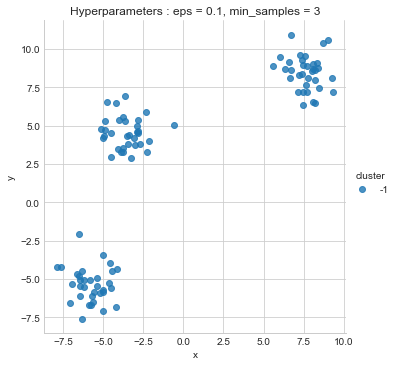

<Figure size 504x504 with 0 Axes>

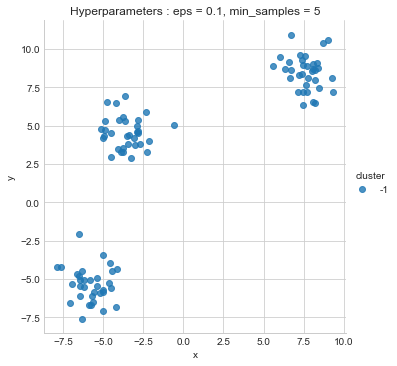

<Figure size 504x504 with 0 Axes>

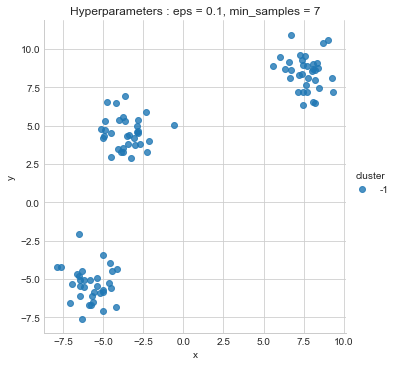

<Figure size 504x504 with 0 Axes>

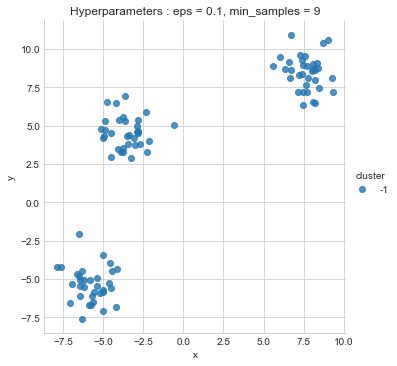

<Figure size 504x504 with 0 Axes>

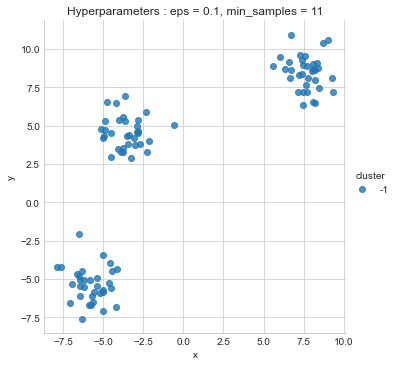

<Figure size 504x504 with 0 Axes>

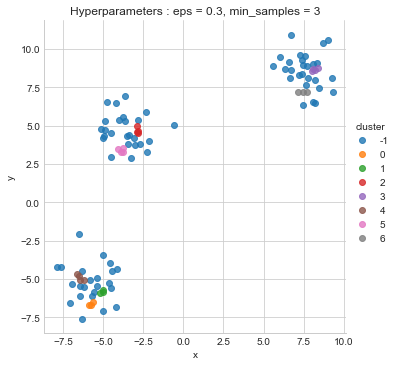

<Figure size 504x504 with 0 Axes>

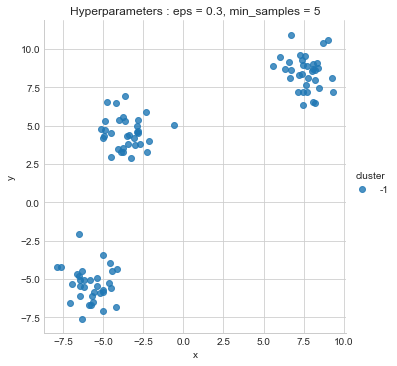

<Figure size 504x504 with 0 Axes>

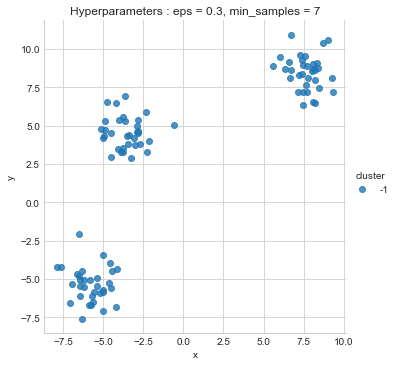

<Figure size 504x504 with 0 Axes>

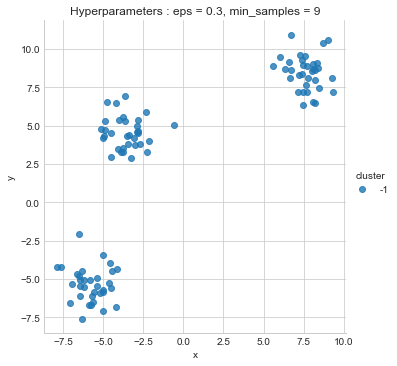

<Figure size 504x504 with 0 Axes>

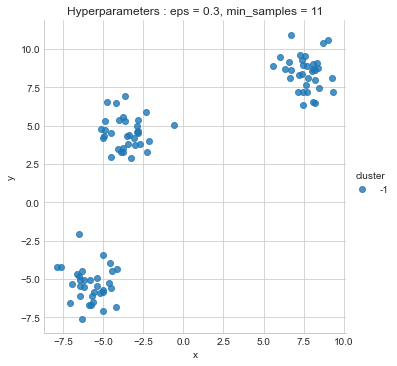

<Figure size 504x504 with 0 Axes>

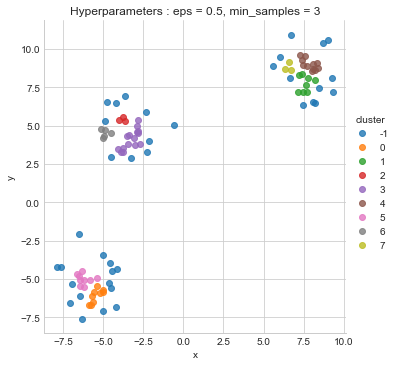

<Figure size 504x504 with 0 Axes>

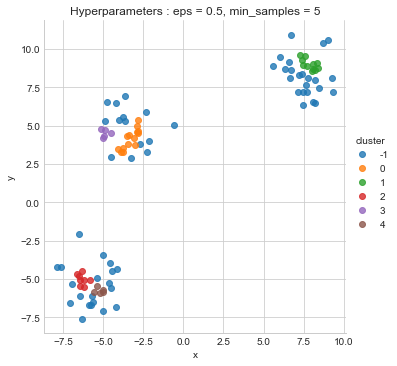

<Figure size 504x504 with 0 Axes>

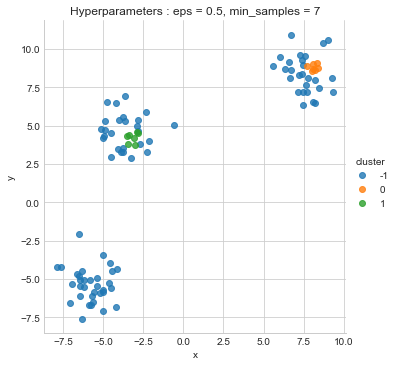

<Figure size 504x504 with 0 Axes>

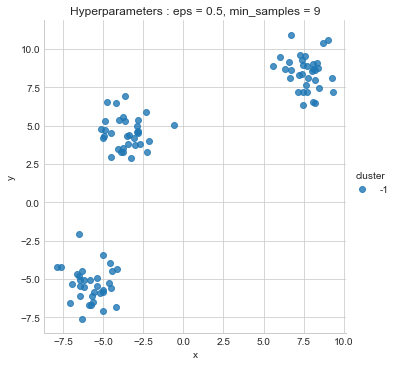

<Figure size 504x504 with 0 Axes>

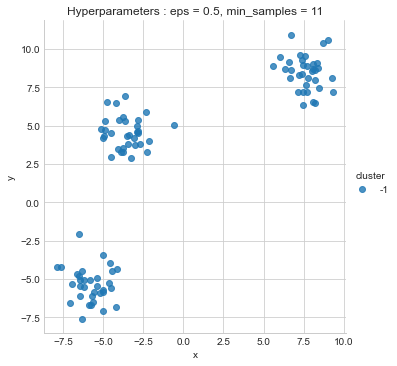

<Figure size 504x504 with 0 Axes>

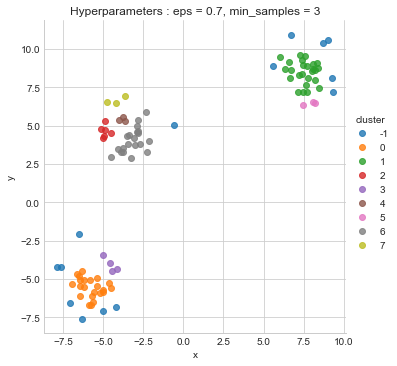

<Figure size 504x504 with 0 Axes>

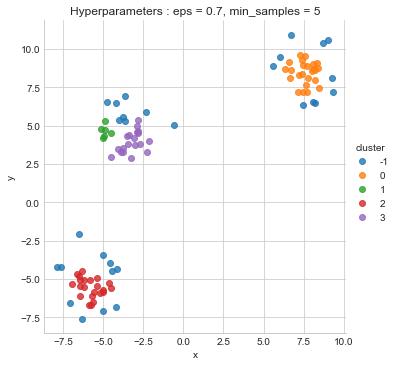

<Figure size 504x504 with 0 Axes>

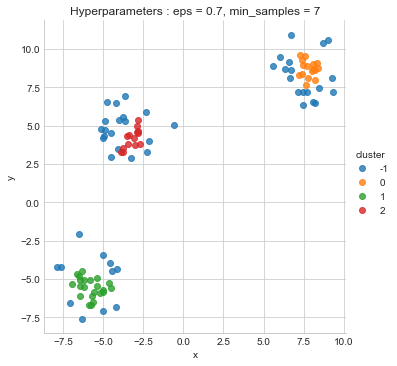

<Figure size 504x504 with 0 Axes>

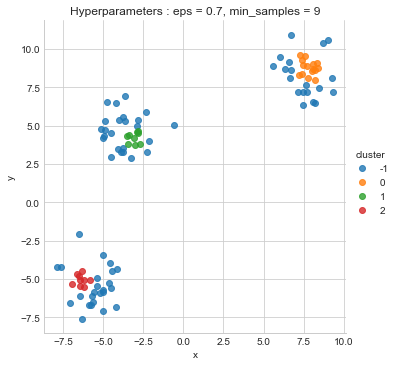

<Figure size 504x504 with 0 Axes>

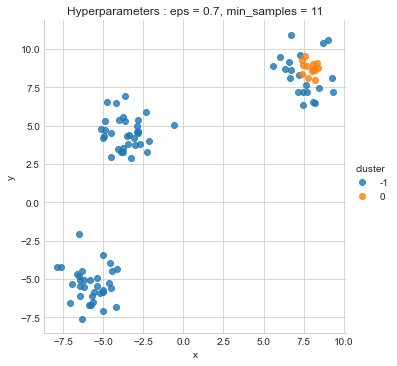

<Figure size 504x504 with 0 Axes>

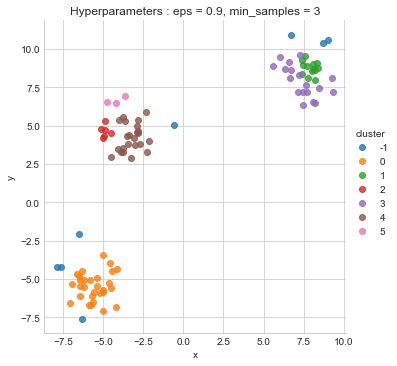

<Figure size 504x504 with 0 Axes>

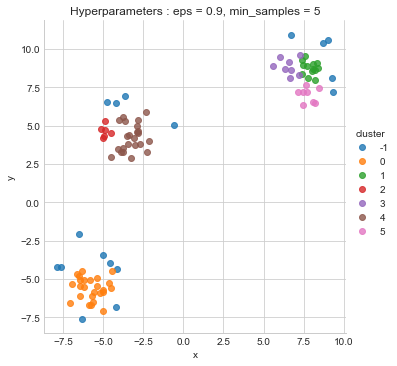

<Figure size 504x504 with 0 Axes>

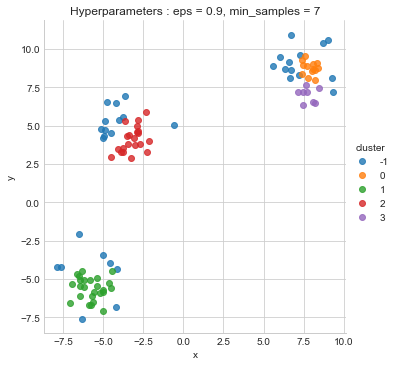

<Figure size 504x504 with 0 Axes>

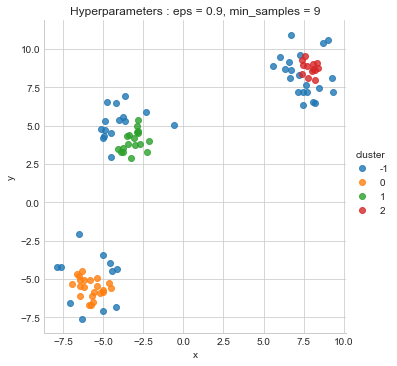

<Figure size 504x504 with 0 Axes>

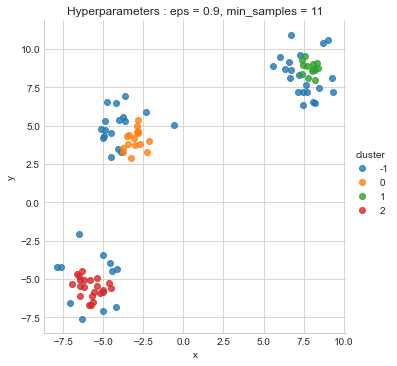

In [5]:
def dbscan_cluster(eps, min_samples):
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    cluster = dbscan.fit_predict(df)
    df['cluster'] = cluster
    plt.figure(figsize = (7,7))
    sns.lmplot(x = 'x', y = 'y', data = df, hue = 'cluster', fit_reg = False)
    plt.title(f'Hyperparameters : eps = {eps}, min_samples = {min_samples}')
    plt.show()

eps_ = [0.1, 0.3, 0.5, 0.7, 0.9]
min_samples_ = [3, 5, 7, 9, 11]

for eps in eps_:
    for min_samples in min_samples_:
        dbscan_cluster(eps, min_samples)

# 2. 정규화된 선형회귀법(Lasso / Ridge / ElasticNet) - 회귀
* 정규화 : 가중치가 너무 커지는것을 방지(과적합 방지) -> 일반화 성능 향상
  * L1정규화 / L2정규화

## - 선형회귀 : Cost = RSS(residual sum of squares)
* RSS(Residual Sum of Square)를 최소화하는 weight, bias 탐색

## - Lasso : Cost = RSS + α * L1Norm
* L1 정규화(Manhattan Distance)
* 변수에 대한 가중치(회귀계수)를 0으로 만들 수 있음 --> 변수선택 가능

## - Ridge : Cost = RSS + α * L2Norm
* L2 정규화(Euclidean Distance)
* 변수에 대한 가중치(회귀계수)가 0으로 가까이만 갈뿐 0이 되지 않음 --> 변수선택 불가
  
## - ElasticNet : Cost = RSS + α$_1$ * L1Norm + α$_2$ * L2Norm)
* L1 + L2 정규화 (두 정규화 항의 비율의 합이 1)
* α$_1$ + α$_2$ = 1

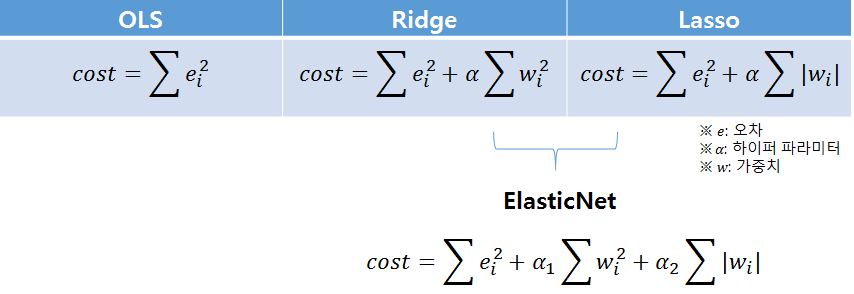

## - L1Norm vs L2Norm
* L1Norm = 모든 가중치들의 절대값의 합에 대한 제약(Manhattan Distance)
  * $\large|\beta_1| + |\beta_2| \leqq t$


* L2Norm = 모든 가중치들의 제곱의 합에 대한 제약(Euclidean Distance)
  * $\large\beta_1^2 + \beta_2^2 \leqq t$

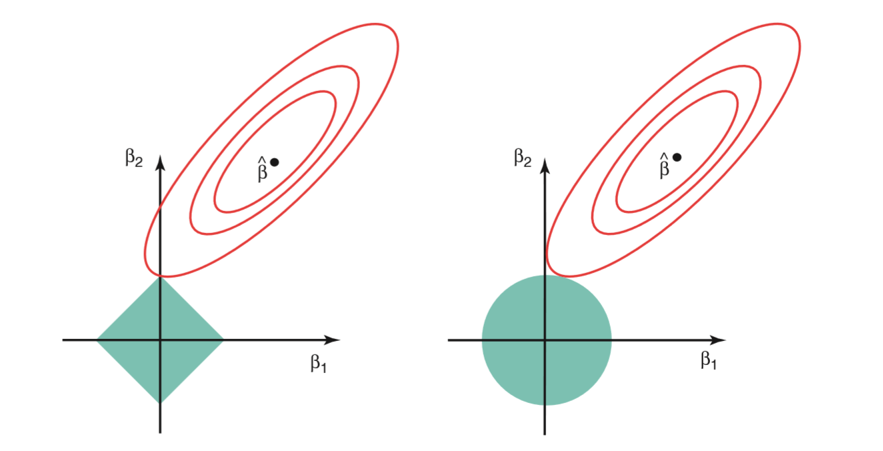

# * 예시

### - DataLoad

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_boston()
x = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

### - 일반선형회귀

In [2]:
model = LinearRegression()
model.fit(X_train, y_train)
for i, col in enumerate(X_train.columns):
    print(f'{col} = {model.coef_[i]:.4f}')
print(f'Intercept = {model.intercept_:.4f}')

CRIM = -0.1131
ZN = 0.0301
INDUS = 0.0404
CHAS = 2.7844
NOX = -17.2026
RM = 4.4388
AGE = -0.0063
DIS = -1.4479
RAD = 0.2624
TAX = -0.0106
PTRATIO = -0.9155
B = 0.0124
LSTAT = -0.5086
Intercept = 30.2468


### - 라쏘(알파값에 따라 회귀계수와 Loss 변화)

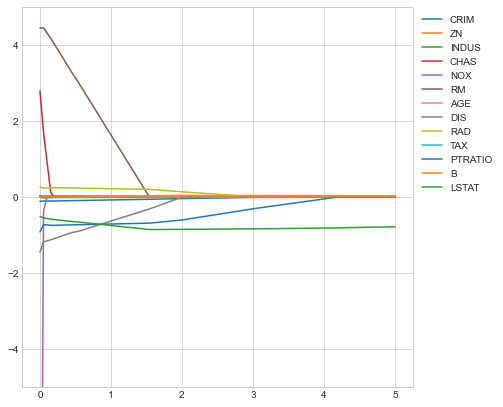

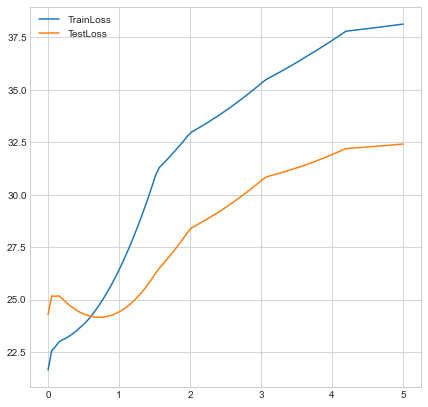

In [6]:
alphas = np.linspace(0, 5, 100)

df = pd.DataFrame(columns = list(x.columns) + ['Intercept', 'Alpha', 'TrainLoss', 'TestLoss'])

for alpha in alphas:
    data = []
    model = Lasso(alpha = alpha)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_loss = mean_squared_error(train_pred, y_train)
    test_loss = mean_squared_error(test_pred, y_test)
    
    data.extend(list(model.coef_))
    data.append(model.intercept_)
    data.append(alpha)
    data.append(train_loss)
    data.append(test_loss)
    df.loc[len(df)] = data

plt.figure(figsize = (7, 7))
for col in x.columns:
    plt.plot(df['Alpha'], df[col], label = col)
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(-5, 5)
plt.show()

plt.figure(figsize = (7, 7))
plt.plot(df['Alpha'], df['TrainLoss'], label = 'TrainLoss')
plt.plot(df['Alpha'], df['TestLoss'], label = 'TestLoss')
plt.legend()
plt.show()

### - 릿지(알파값에 따라 회귀계수와 Loss 변화)

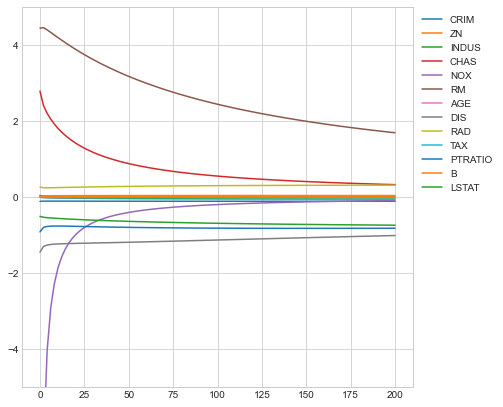

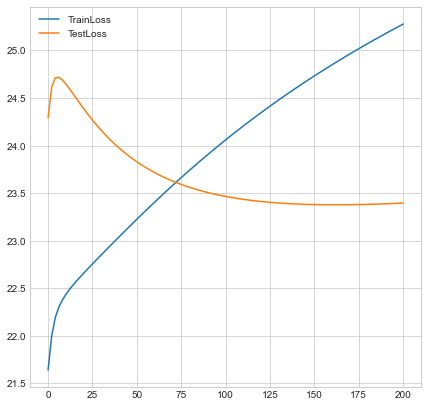

In [7]:
alphas = np.linspace(0, 200, 100)

df = pd.DataFrame(columns = list(x.columns) + ['Intercept', 'Alpha', 'TrainLoss', 'TestLoss'])

for alpha in alphas:
    data = []
    model = Ridge(alpha = alpha)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_loss = mean_squared_error(train_pred, y_train)
    test_loss = mean_squared_error(test_pred, y_test)
    
    data.extend(list(model.coef_))
    data.append(model.intercept_)
    data.append(alpha)
    data.append(train_loss)
    data.append(test_loss)
    df.loc[len(df)] = data

plt.figure(figsize = (7, 7))
for col in x.columns:
    plt.plot(df['Alpha'], df[col], label = col)
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(-5, 5)
plt.show()

plt.figure(figsize = (7, 7))
plt.plot(df['Alpha'], df['TrainLoss'], label = 'TrainLoss')
plt.plot(df['Alpha'], df['TestLoss'], label = 'TestLoss')
plt.legend()
plt.show()